In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
alpha = [0.6,0.7,0.8,0.9]
threshold = [1,1.2]
# 构建文件路径
dp_name = "dp1_0.05_dp2_0"
result = pd.DataFrame()
for ts in threshold:
    for al in alpha:
        PATH = f"result_LA_threshold_{ts}_alpha_{al}"
        path = os.path.join(PATH,dp_name,'performance_tmp.csv')
        performance = pd.read_csv(path)
        # 优先满足val_r2的值, 即val_r2要最大
        max_val_r2 = performance['val_r2'].max()
        performance_val_r2 = performance[performance['val_r2']==max_val_r2]
        # 其次满足auprc最大
        max_auprc = performance_val_r2['AUPRC'].max()
        performance_auprc = performance_val_r2[performance_val_r2['AUPRC']==max_auprc]
        performance_auprc['alpha'] = al
        performance_auprc['threshold'] = ts
        result = pd.concat([result, performance_auprc], ignore_index=True)

result

# # 存储到一个新的 CSV 文件中
# output_path = os.path.join(PATH, 'dp_best.csv')
# dp_best.to_csv(output_path, index=False)

/tmp/ipykernel_163520/3544092282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_auprc['alpha'] = al
/tmp/ipykernel_163520/3544092282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_auprc['threshold'] = ts
/tmp/ipykernel_163520/3544092282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,Unnamed: 0,network_type,cv,weight_decay,refit,num_train_ksr,num_test_ksr,AUPRC,AUROC,MCC,...,FN,train_loss,val_loss,val_r2,activation,drop_p_prior,drop_p_kki,drop_p_ksr,alpha,threshold
0,196,cpd,2,1.000000e-10,9.0,74575,18486,0.191452,0.588859,0.126296,...,9739.0,0.011281,0.012009,0.889713,ReLU0,0.05,0,0,0.6,1.0
1,416,cpd,4,1.000000e-04,9.0,74466,18595,0.245199,0.628970,0.191221,...,10575.0,0.011381,0.011993,0.889851,ReLU0,0.05,0,0,0.7,1.0
2,374,cpd,4,1.000000e-07,NaN,74466,18595,0.206809,0.672262,0.195633,...,3309.0,0.012072,0.010986,0.897084,ReLU0,0.05,0,0,0.8,1.0
3,352,cpd,4,1.000000e-10,NaN,74466,18595,0.207069,0.661074,0.182825,...,4022.0,0.010402,0.009497,0.911022,ReLU0,0.05,0,0,0.9,1.0
4,20,cpd,0,1.000000e-10,9.0,74530,18531,0.226649,0.643802,0.165259,...,7016.0,0.010381,0.011137,0.897775,ReLU0,0.05,0,0,0.6,1.2
5,218,cpd,2,1.000000e-07,9.0,74575,18486,0.200203,0.607511,0.142153,...,8686.0,0.009463,0.010174,0.906568,ReLU0,0.05,0,0,0.7,1.2
6,374,cpd,4,1.000000e-07,NaN,74466,18595,0.205181,0.660502,0.185052,...,4101.0,0.009662,0.008713,0.918393,ReLU0,0.05,0,0,0.8,1.2
7,352,cpd,4,1.000000e-10,NaN,74466,18595,0.212571,0.679241,0.197766,...,3451.0,0.007596,0.006848,0.935848,ReLU0,0.05,0,0,0.9,1.2


In [7]:
dp_name = "dp1_0.05_dp2_0"
result = pd.DataFrame()
PATH = f"result_LA_no_threshold"
path = os.path.join(PATH,dp_name,'performance_tmp.csv')
performance = pd.read_csv(path)
# 优先满足val_r2的值, 即val_r2要最大
max_val_r2 = performance['val_r2'].max()
performance_val_r2 = performance[performance['val_r2']==max_val_r2]
# 其次满足auprc最大
max_auprc = performance_val_r2['AUPRC'].max()
performance_auprc = performance_val_r2[performance_val_r2['AUPRC']==max_auprc]
result = pd.concat([result, performance_auprc], ignore_index=True)
no_threshold_result = result

In [3]:
threshold_1_result = result[result['threshold'] == 1]
threshold_12_result = result[result['threshold'] == 1.2]

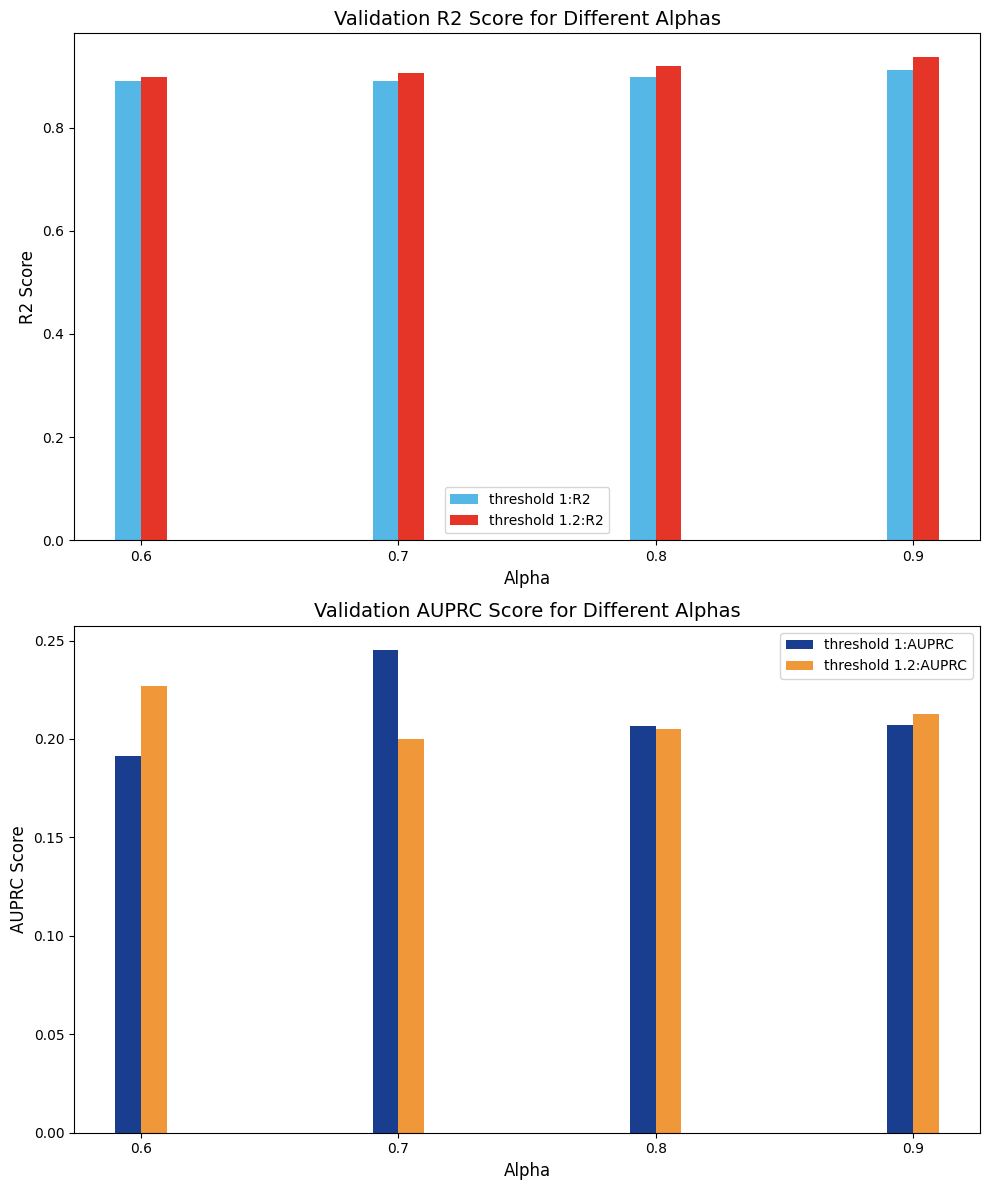

In [9]:
val_r2_threshold_1 = threshold_1_result['val_r2']
auprc_threshold_1 = threshold_1_result['AUPRC']
alpha = threshold_1_result['alpha']

val_r2_threshold_12 = threshold_12_result['val_r2']
auprc_threshold_12 = threshold_12_result['AUPRC']

bar_width = 0.1
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

x = np.arange(len(alpha))
axes[0].bar(x, val_r2_threshold_1, width=bar_width, color='#55b7e6', label='threshold 1:R2')
axes[0].bar([i + bar_width for i in x], val_r2_threshold_12, width=bar_width, color='#e53528', label='threshold 1.2:R2')
axes[0].set_xlabel('Alpha', fontsize=12)
axes[0].set_ylabel('R2 Score', fontsize=12)
axes[0].set_title('Validation R2 Score for Different Alphas', fontsize=14)
axes[0].set_xticks([i + bar_width / 2 for i in x])
axes[0].set_xticklabels(alpha)
axes[0].legend()

axes[1].bar(x, auprc_threshold_1, width=bar_width, color='#193e8f', label='threshold 1:AUPRC')
axes[1].bar([i + bar_width for i in x], auprc_threshold_12, width=bar_width, color='#f09739', label='threshold 1.2:AUPRC')
axes[1].set_xlabel('Alpha', fontsize=12)
axes[1].set_ylabel('AUPRC Score', fontsize=12)
axes[1].set_title('Validation AUPRC Score for Different Alphas', fontsize=14)
axes[1].set_xticks([i + bar_width / 2 for i in x])
axes[1].set_xticklabels(alpha)
axes[1].legend()

plt.tight_layout()
plt.show()

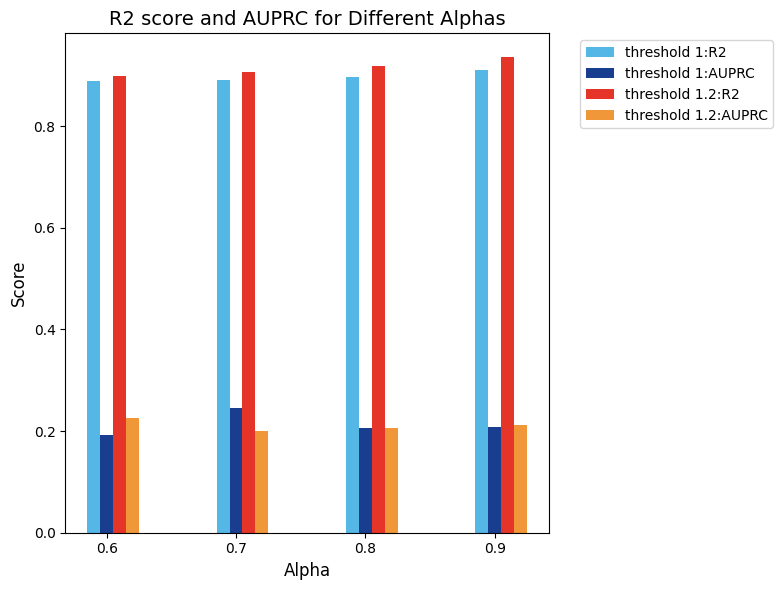

In [4]:
val_r2_threshold_1 = threshold_1_result['val_r2']
auprc_threshold_1 = threshold_1_result['AUPRC']
alpha = threshold_1_result['alpha']

val_r2_threshold_12 = threshold_12_result['val_r2']
auprc_threshold_12 = threshold_12_result['AUPRC']

plt.figure(figsize=(8, 6))
bar_width = 0.1


x = np.arange(len(alpha))
plt.bar(x, val_r2_threshold_1, width=bar_width, color = '#55b7e6',label='threshold 1:R2')
plt.bar([i + bar_width for i in x], auprc_threshold_1, width=bar_width, color = '#193e8f',label='threshold 1:AUPRC')
plt.bar([i + 2 * bar_width for i in x], val_r2_threshold_12, width=bar_width, color = '#e53528',label='threshold 1.2:R2')
plt.bar([i + 3 * bar_width for i in x], auprc_threshold_12, width=bar_width, color = '#f09739',label='threshold 1.2:AUPRC')

# 添加标签
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('R2 score and AUPRC for Different Alphas', fontsize=14)
plt.xticks(x + bar_width, alpha)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# 显示图表
plt.tight_layout()
plt.show()

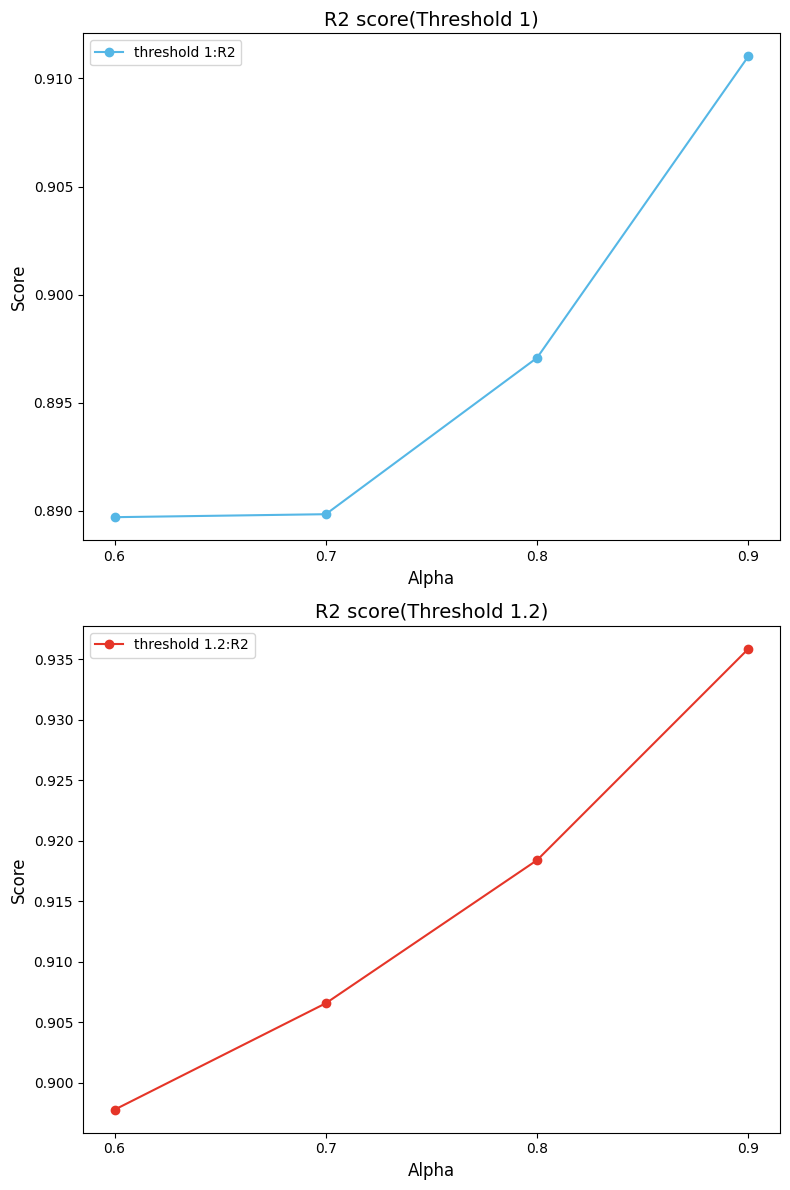

In [10]:
val_r2_threshold_1 = threshold_1_result['val_r2']
alpha = threshold_1_result['alpha']

val_r2_threshold_12 = threshold_12_result['val_r2']

plt, axes = plt.subplots(2,1,figsize=(8,12))
x = np.arange(len(alpha))

axes[0].plot(x,val_r2_threshold_1,marker='o',color = '#55b7e6',label = 'threshold 1:R2')
axes[0].set_xlabel('Alpha',fontsize=12)
axes[0].set_ylabel('Score',fontsize=12)
axes[0].set_title('R2 score(Threshold 1)',fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(alpha)
axes[0].legend()

axes[1].plot(x,val_r2_threshold_12,marker='o',color = '#e53528',label = 'threshold 1.2:R2')
axes[1].set_xlabel('Alpha',fontsize=12)
axes[1].set_ylabel('Score',fontsize=12)
axes[1].set_title('R2 score(Threshold 1.2)',fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(alpha)
axes[1].legend()

plt.tight_layout()
plt.show()

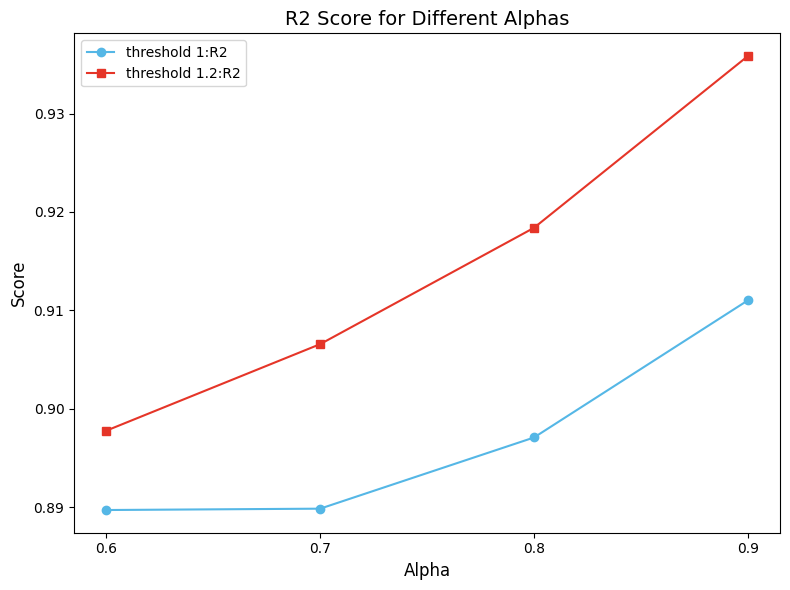

In [5]:
val_r2_threshold_1 = threshold_1_result['val_r2']
alpha = threshold_1_result['alpha']

val_r2_threshold_12 = threshold_12_result['val_r2']

plt.figure(figsize=(8, 6))

# x 坐标
x = np.arange(len(alpha))

# 绘制折线图
plt.plot(x, val_r2_threshold_1, marker='o', color = '#55b7e6',label='threshold 1:R2')
plt.plot(x, val_r2_threshold_12, marker='s', color = '#e53528',label='threshold 1.2:R2')

# 添加标签
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('R2 Score for Different Alphas', fontsize=14)
plt.xticks(x, alpha)  # 将 x 轴刻度对齐 alpha
plt.legend()

# 显示图表
plt.tight_layout()
plt.show() 